# Regression Week 3: Assessing Fit (polynomial regression)

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take an SArray and a degree and return an SFrame where each column is the SArray to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the SArray column 2 is the SArray squared and column 3 is the SArray cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

# Fire up Turi Create

In [ ]:
pip install turicreate

     |████████████████████████████████| 91.9MB 34kB/s 
     |████████████████████████████████| 2.1MB 33.1MB/s 
     |████████████████████████████████| 86.3MB 34kB/s 
     |████████████████████████████████| 20.2MB 108kB/s 
     |████████████████████████████████| 3.4MB 40.2MB/s 
     |████████████████████████████████| 3.8MB 31.3MB/s 
     |████████████████████████████████| 450kB 42.1MB/s 
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.4.0 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
  Found existing installation: Pillow 4.3.0
    Uninstalling Pillow-4.3.0:
      Successfully uninstalled Pillow-4.3.0
  Found existing installation: google-auth-oauthlib 0.4.0
    Uninstalling google-auth-oauthlib-0.4.0:
      Successfully uninstalled google-auth-oauthlib-0.4.0
  Found existing installation: tensorboard 2.1.0
    Uninstalling tensorboard-2.1.0:
      Successfully uninstalled tensor

In [ ]:
import turicreate

**1.** You’re going to write a function that adds powers of a feature to columns of a data frame. For those using SFrames:

Recall that if we have an SArray ‘tmp’ we can get a new SArray with all the values to the third power with:

`tmp_cubed = tmp.apply(lambda x: x**3)`

Next we're going to write a polynomial function that takes an SArray and a maximal degree and returns an SFrame with columns containing the SArray to all the powers up to the maximal degree.

The easiest way to apply a power to an SArray is to use the .apply() and lambda x: functions. 
For example to take the example array and compute the third power we can do as follows: (note running this cell the first time may take longer than expected since it loads Turi Create)

In [ ]:
tmp = turicreate.SArray([1., 2., 3.])
tmp_cubed = tmp.apply(lambda x: x**3)
print tmp
print tmp_cubed

[1.0, 2.0, 3.0]
[1.0, 8.0, 27.0]


We can create an empty SFrame with: 
`my_SFrame = turicreate.SFrame()`

And append the tmp to it with:
`my_SFrame['power_1'] = tmp`

Where here ‘power_1’ will refer to the power our feature was raised to. 

We can create an empty SFrame using turicreate.SFrame() and then add any columns to it with ex_sframe['column_name'] = value. For example we create an empty SFrame and make the column 'power_1' to be the first power of tmp (i.e. tmp itself).

In [ ]:
ex_sframe = turicreate.SFrame()
ex_sframe['power_1'] = tmp
print ex_sframe

+---------+
| power_1 |
+---------+
|   1.0   |
|   2.0   |
|   3.0   |
+---------+
[3 rows x 1 columns]



# 2. Polynomial_sframe function
* Write your own function called ‘polynomial_sframe’ (or otherwise) which accepts an array ‘feature’ and a maximal ‘degree’ and returns an data frame (e.g. SFrame) with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’.

Using the hints above complete the following function to create an SFrame consisting of the powers of an SArray up to a specific degree:

In [ ]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = turicreate.SFrame()

    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature

    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature ** power

    return poly_sframe

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [ ]:
print polynomial_sframe(tmp, 3)

+---------+---------+---------+
| power_1 | power_2 | power_3 |
+---------+---------+---------+
|   1.0   |   1.0   |   1.0   |
|   2.0   |   4.0   |   8.0   |
|   3.0   |   9.0   |   27.0  |
+---------+---------+---------+
[3 rows x 3 columns]



# 3. Visualizing polynomial regression
* For the remainder of the assignment we will be working with the house Sales data as in the previous notebooks. Load in the data and also sort the sales SFrame by ‘sqft_living’. When we plot the fitted values we want to join them up in a line and this works best if the variable on the X-axis (which will be ‘sqft_living’) is sorted. For houses with identical square footage, we break the tie by their prices.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

In [ ]:
# sales = turicreate.SFrame('home_data.sframe/')
sales = turicreate.SFrame('/content/gdrive/My Drive/Turicreate/Week 9/home_data.sframe/')

As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [ ]:
sales = sales.sort(['sqft_living', 'price'])

**4.** Make a 1 degree polynomial SFrame with sales[‘sqft_living’] as the the feature. Call it ‘poly1_data’.

**5.** Add sales[‘price’] to poly1_data as this will be our output variable. e.g. if you’re using SFrames

Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [ ]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

In [ ]:
poly1_data

power_1,price
290.0,142000.0
370.0,276000.0
380.0,245000.0
384.0,265000.0
390.0,228000.0
390.0,245000.0
410.0,325000.0
420.0,229050.0
420.0,280000.0
430.0,80000.0


NOTE: for all the models in this notebook use validation_set = None to ensure that all results are consistent across users.

**6.** Use `turicreate.linear_regression.create` (or another linear regression library) to compute the regression weights for predicting sales[‘price’] based on the 1 degree polynomial feature ‘sqft_living’. The result should be an intercept and slope.

In [ ]:
model1 = turicreate.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.004910     | 4362074.696077     | 261440.790724                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [ ]:
#let's take a look at the weights before we plot
model1.coefficients

name,index,value,stderr
(intercept),None,-43579.0852514,4402.68969743
power_1,None,280.622770886,1.93639855513


**7.** Next use the produce a scatter plot of the training data (just square feet vs price) and add the fitted model. e.g. with matplotlib and SFrames:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

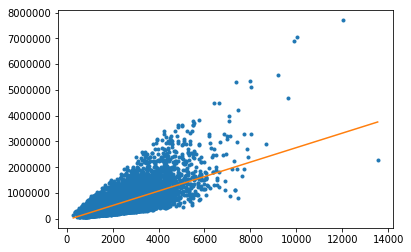

In [ ]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
         poly1_data['power_1'], model1.predict(poly1_data),'-')

Let's unpack that plt.plot() command. The first pair of SArrays we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

**8.** Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial. Look at the fitted lines, do they appear as you would expect?

In [ ]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
my_features = poly2_data.column_names() # get the name of the features
poly2_data['price'] = sales['price'] # add price to the data since it's the target
model2 = turicreate.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.011504     | 5913020.984255     | 250948.368758                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [ ]:
model2.coefficients

name,index,value,stderr
(intercept),None,199222.496445,7058.00483552
power_1,None,67.9940640677,5.28787201316
power_2,None,0.0385812312789,0.000898246547032


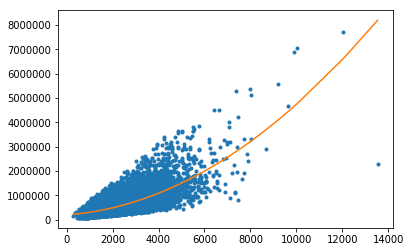

In [ ]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
         poly2_data['power_1'], model2.predict(poly2_data),'-')

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

In [ ]:
poly3_data = polynomial_sframe(sales['sqft_living'], 3)
poly3_features = poly3_data.column_names() # get the name of the features
poly3_data['price'] = sales['price'] # add price to the data since it's the target
model3 = turicreate.linear_regression.create(poly3_data, target = 'price', features = poly3_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.016356     | 3261066.736007     | 249261.286346                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [ ]:
model3.coefficients

name,index,value,stderr
(intercept),None,336788.117952,10661.0153713
power_1,None,-90.1476236119,10.6222891844
power_2,None,0.087036715081,0.00296630623148
power_3,None,-3.8398521196e-06,2.2417490959e-07


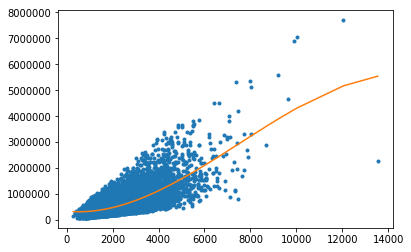

In [ ]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
        poly3_data['power_1'], model3.predict(poly3_data),'-')

**9.** Now try a 15th degree polynomial. Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

Now try a 15th degree polynomial:

In [ ]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
poly15_features = poly15_data.column_names() # get the name of the features
poly15_data['price'] = sales['price'] # add price to the data since it's the target
model15 = turicreate.linear_regression.create(poly15_data, target = 'price', features = poly15_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.052106     | 2662308.584345     | 245690.511190                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [ ]:
model15.coefficients

name,index,value,stderr
(intercept),None,73619.752129,417177.208962
power_1,None,410.287462498,1916.32981023
power_2,None,-0.2304507144,3.66578539836
power_3,None,7.58840542363e-05,0.00385410587314
power_4,None,-5.65701802567e-09,2.47831613314e-06
power_5,None,-4.57028130539e-13,1.02429831212e-09
power_6,None,2.66360206364e-17,2.77685473451e-13
power_7,None,3.38584769253e-21,5.00096783087e-17
power_8,None,1.14723104041e-25,6.59309806461e-21
power_9,None,-4.65293585806e-30,8.42537440631e-25


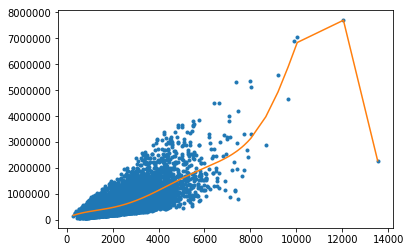

In [ ]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        poly15_data['power_1'], model15.predict(poly15_data),'-')

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

# 10. Changing the data and re-learning
* If you’re using SFrames then create four subsets as follows:
> * first split sales into 2 subsets with .random_split(.5) use seed = 0!
> * next split these into 2 more subsets (4 total) using random_split(0.5) again set seed = 0!
> * you should have 4 subsets of (approximately) equal size, call them set_1, set_2, set_3, and set_4 

We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above). The quiz will ask you some questions about these results.

To split the sales data into four subsets, we perform the following steps:
* First split sales into 2 subsets with `.random_split(0.5, seed=0)`. 
* Next split the resulting subsets into 2 more subsets each. Use `.random_split(0.5, seed=0)`.

We set `seed=0` in these steps so that different users get consistent results.
You should end up with 4 subsets (`set_1`, `set_2`, `set_3`, `set_4`) of approximately equal size. 

In [ ]:
bigset_1, bigset_2 = sales.random_split(0.5, seed=0)
set_1, set_2 = bigset_1.random_split(0.5, seed=0)
set_3, set_4 = bigset_2.random_split(0.5, seed=0)

**11.** Estimate a 15th degree polynomial on all 4 sets, plot the results and view the coefficients for all four models.

Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

In [ ]:
def get_poly_model(set_data):
    poly15_data = polynomial_sframe(set_data['sqft_living'], 15)
    poly15_features = poly15_data.column_names() # get the name of the features
    poly15_data['price'] = set_data['price'] # add price to the data since it's the target
    model15 = turicreate.linear_regression.create(poly15_data, target = 'price', features = poly15_features, validation_set = None)
    return poly15_data, model15
    

def get_coef(set_data):
    poly15_data, model15 = get_poly_model(set_data)
    #return model15.get("coefficients")
    return model15.coefficients

def plot_fitted_line(set_data):
    poly15_data, model15 = get_poly_model(set_data)
    return plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
           poly15_data['power_1'], model15.predict(poly15_data),'-')

In [ ]:
set_1_coef = get_coef(set_1)
print set_1_coef[set_1_coef['name'] == 'power_15']

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.028402     | 2195218.932304     | 248858.822200                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

+----------+-------+------------------+-------------------+
|   name   | index |      value       |       stderr      |
+----------+-------+------------------+-------------------+
| power_15 |  None | 5.0197523302e-55 | 3.10613877882e-50 |
+----------+-------+------------------+-------------------+
[? rows x 4 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.012250     | 2195218.932304     | 248858.822200                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

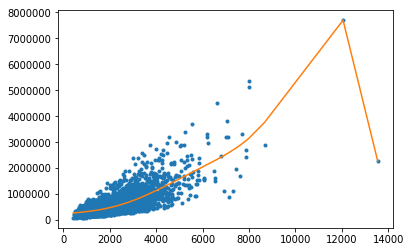

In [ ]:
plot_fitted_line(set_1)

In [ ]:
set_2_coef = get_coef(set_2)
print set_2_coef[set_2_coef['name'] == 'power_15']

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.024805     | 2069212.978547     | 234840.067186                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

+----------+-------+-------------------+-------------------+
|   name   | index |       value       |       stderr      |
+----------+-------+-------------------+-------------------+
| power_15 |  None | 1.68636658316e-52 | 5.36477466421e-48 |
+----------+-------+-------------------+-------------------+
[? rows x 4 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.024636     | 2069212.978547     | 234840.067186                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

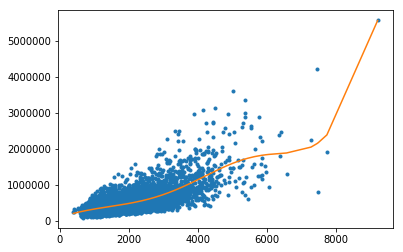

In [ ]:
plot_fitted_line(set_2)

In [ ]:
set_3_coef = get_coef(set_3)
print set_3_coef[set_3_coef['name'] == 'power_15']

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.013998     | 2269769.506520     | 251460.072754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

+----------+-------+-------------------+-------------------+
|   name   | index |       value       |       stderr      |
+----------+-------+-------------------+-------------------+
| power_15 |  None | 6.39045886088e-53 | 5.51643972144e-49 |
+----------+-------+-------------------+-------------------+
[? rows x 4 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.011253     | 2269769.506520     | 251460.072754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

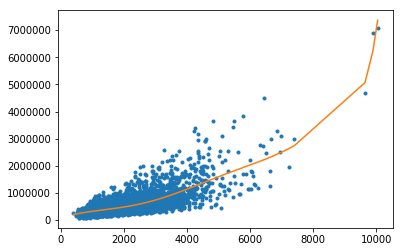

In [ ]:
plot_fitted_line(set_3)

In [ ]:
set_4_coef = get_coef(set_4)
print set_4_coef[set_4_coef['name'] == 'power_15']

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.024207     | 2314893.173831     | 244563.136754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

+----------+-------+--------------------+-------------------+
|   name   | index |       value        |       stderr      |
+----------+-------+--------------------+-------------------+
| power_15 |  None | -4.74535333107e-51 | 1.57295635973e-47 |
+----------+-------+--------------------+-------------------+
[? rows x 4 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.025334     | 2314893.173831     | 244563.136754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

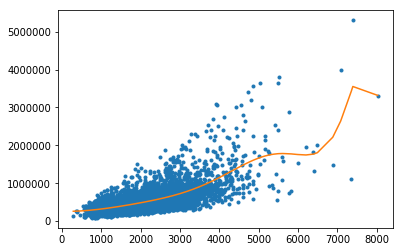

In [ ]:
plot_fitted_line(set_4)

Some questions you will be asked on your quiz:

**12. Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?**

**13. Quiz Question: (True/False) the plotted fitted lines look the same in all four plots**

# 14. Selecting a Polynomial Degree
* Since the “best” polynomial degree is unknown to us we will use cross validation to select the best degree. If you’re using SFrames then create a training, validation and testing subsets as follows: 
> * First split sales into training_and_validation and testing with sales.random_split(0.9) use seed = 1!
> * Next split training_and_validation into training and validation using .random_split(0.5) use seed = 1!

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `training_and_validation` and `testing`. Use `random_split(0.9, seed=1)`.
* Further split our training data into two sets: `training` and `validation`. Use `random_split(0.5, seed=1)`.

Again, we set `seed=1` to obtain consistent results for different users.

In [ ]:
training_and_validation_data, test_data = sales.random_split(0.9, seed=1)
train_data, validation_data = training_and_validation_data.random_split(0.5, seed=1)

**15.** Now for each degree from 1 to 15:
* Build an polynomial data set using training_data[‘sqft_living’] as the feature and the current degree
* Add training_data[‘price’] as a column to your polynomial data set
* Learn a model on TRAINING data to predict ‘price’ based on your polynomial data set at the current degree
* Compute the RSS on VALIDATION for the current model (print or save the RSS)

*Hint: in turicreate.linear_regression.create() you can set verbose = False if you want to suppress the interim output of linear_regression.create().*

Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
    * hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for turicreate.linear_regression.create( features = my_features)
    * Add train_data['price'] to the polynomial SFrame
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

(Note you can turn off the print out of linear_regression.create() with verbose = False)

In [ ]:
arr = []
for degree in range(1, 16):
    poly_data = polynomial_sframe(train_data['sqft_living'], degree)      
    my_features = poly_data.column_names()
    poly_data['price'] = train_data['price']
    model = turicreate.linear_regression.create(poly_data, target = 'price', features = my_features, 
                                              validation_set = None, verbose = False)
    validation_data_poly = polynomial_sframe(validation_data['sqft_living'], degree)
    predictions = model.predict(validation_data_poly)
    residuals = validation_data['price'] - predictions
    rss = sum(residuals * residuals)
    arr.append(rss)
#     print degree
#     print rss 

for degree, rss in enumerate(arr):
    print degree, rss

print

# Note that list index starts from 0, so degree = index + 1
print arr.index(min(arr)), min(arr)

0 6.76709775198e+14
1 6.07090530698e+14
2 6.16714574533e+14
3 6.09129230654e+14
4 5.99177138584e+14
5 5.8918247781e+14
6 5.91717038418e+14
7 6.01558237777e+14
8 6.12563853986e+14
9 6.2174428894e+14
10 6.27012012708e+14
11 6.27757914775e+14
12 6.24738503267e+14
13 6.19369705906e+14
14 6.13089202408e+14

5 5.8918247781e+14


**16. Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?**

**17.** Now that you have chosen the degree of your polynomial using validation data, compute the RSS of this model on TEST data  with the best degree from the Validation data. Report the RSS on your quiz.

In [ ]:
arr2 = []
for degree in range(1, 16):
    poly_data = polynomial_sframe(train_data['sqft_living'], degree)      
    my_features = poly_data.column_names()
    poly_data['price'] = train_data['price']
    model = turicreate.linear_regression.create(poly_data, target = 'price', features = my_features, 
                                              validation_set = None, verbose = False)
    test_data_poly = polynomial_sframe(test_data['sqft_living'], degree)
    predictions = model.predict(test_data_poly)
    residuals = test_data['price'] - predictions
    rss_test = sum(residuals * residuals)
    arr2.append(rss_test)
#     print degree
#     print rss 

for degree, rss in enumerate(arr2):
     print degree, rss

print

print arr2.index(min(arr2)), min(arr2)

0 1.29030470095e+14
1 1.25190117213e+14
2 1.25939457007e+14
3 1.27147719016e+14
4 1.2703773021e+14
5 1.25529337848e+14
6 1.2460877361e+14
7 1.24458964534e+14
8 1.24525299777e+14
9 1.24602928485e+14
10 1.24641733744e+14
11 1.24646108317e+14
12 1.24632209805e+14
13 1.24612578389e+14
14 1.24593903713e+14

7 1.24458964534e+14


**18. Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data?**

In [ ]:
print arr2[6]

1.2460877361e+14
